In [1]:
from neural.containers import Sequential
from neural.losses import MSE, CE
from neural.layers import Dense, TanH, RELU, Softmax
from neural.utils.preprocessing import OneHotEncoder
import datasets.spiral_data as sd 
from sklearn.model_selection import train_test_split
import numpy as np 
import matplotlib.pyplot as plt 
from neural.utils.visualization import plot_decision_2d

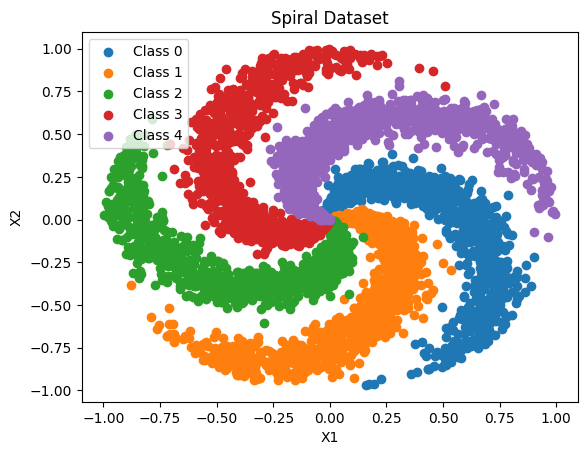

In [2]:
num_classes = 5
(x, y) = sd.generate_spiral_data(n_samples=1000, n_class=num_classes, noise=.2)
sd.plot_spiral(x,y,num_classes)

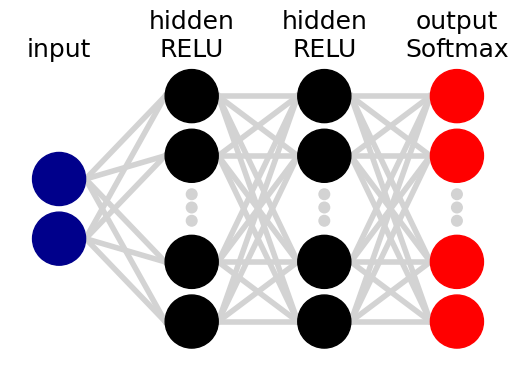

In [3]:
model = Sequential([
    Dense(2, 12),
    RELU(),
    Dense(12, 8),
    RELU(),
    Dense(8, num_classes),
    Softmax()
])

model.display_network()

In [4]:
# encode the y's
encoder = OneHotEncoder()
encoder.fit(y)
y_encoded = encoder.encode(y)
X_train, X_test, y_train, y_test = train_test_split(x, y_encoded, test_size=.2)

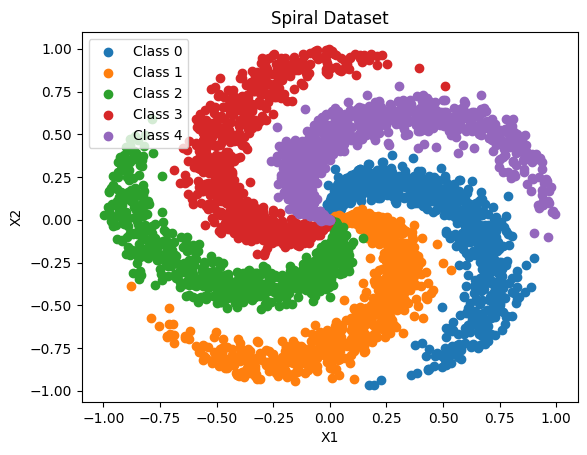

In [5]:
sd.plot_spiral(X_train, encoder.decode(y_train), num_classes=num_classes)

In [6]:
model.fit(X_train, y_train, 200, .01, CE(), accuracy='categorical')
y_pred = encoder.decode(model.predict(X_test))
y_act = encoder.decode(y_test)

Epoch 0/200, Loss: 1.6252, Accuracy: 0.1960
Epoch 10/200, Loss: 1.5252, Accuracy: 0.5367
Epoch 20/200, Loss: 1.1150, Accuracy: 0.4943
Epoch 30/200, Loss: 0.8879, Accuracy: 0.5180
Epoch 40/200, Loss: 0.8182, Accuracy: 0.5590
Epoch 50/200, Loss: 0.7617, Accuracy: 0.5893
Epoch 60/200, Loss: 0.6999, Accuracy: 0.6268
Epoch 70/200, Loss: 0.6365, Accuracy: 0.6827
Epoch 80/200, Loss: 0.5749, Accuracy: 0.7520
Epoch 90/200, Loss: 0.5180, Accuracy: 0.8057
Epoch 100/200, Loss: 0.4679, Accuracy: 0.8423
Epoch 110/200, Loss: 0.4255, Accuracy: 0.8658
Epoch 120/200, Loss: 0.3905, Accuracy: 0.8858
Epoch 130/200, Loss: 0.3620, Accuracy: 0.8972
Epoch 140/200, Loss: 0.3383, Accuracy: 0.9032
Epoch 150/200, Loss: 0.3188, Accuracy: 0.9100
Epoch 160/200, Loss: 0.3021, Accuracy: 0.9155
Epoch 170/200, Loss: 0.2879, Accuracy: 0.9170
Epoch 180/200, Loss: 0.2758, Accuracy: 0.9195
Epoch 190/200, Loss: 0.2658, Accuracy: 0.9243


In [7]:
y_pred = np.argmax(model.predict(X_test), axis=1)
y_act = np.argmax(y_test, axis=1)
accuracy = sum(y_pred == y_act) / len(y_test)
print("Accuracy:", accuracy)

Accuracy: 0.921


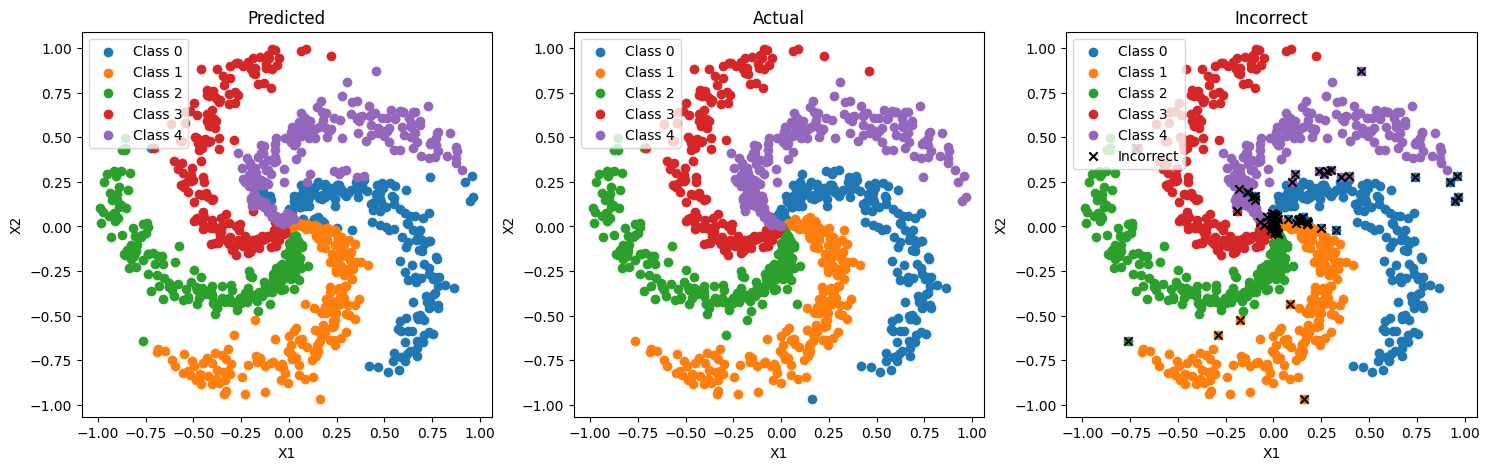

In [8]:
fig, ax = plt.subplots(1, 3, figsize=(18, 5))
ax = ax.flatten()


sd.plot_spiral(X_test, y_pred, num_classes, title="Predicted", ax=ax[0], render=False)
sd.plot_spiral(X_test, y_act, num_classes, title="Actual", ax=ax[1], render=False)
sd.plot_spiral(X_test, y_pred, num_classes, title="Incorrect", correct=y_act, ax=ax[2], render=False)
plt.show()

# Look at the Decision Boundry for the Model

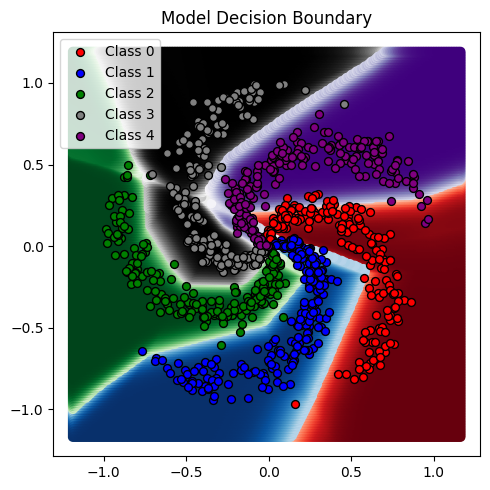

In [10]:
plt.figure(figsize=(5,5))
plot_decision_2d(model, X_test, y_test)